In [1]:
import numpy as np
import pandas as pd
import math
import time
import matplotlib.pyplot as plt

### IMU data - Slide

In [2]:
df=pd.read_csv("slide.txt",sep=" ",skiprows=range(0,9),skipfooter=10,header=None)
df=df.drop([0,12],axis=1)
df[:5]

C:\Users\David\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,1,2,3,4,5,6,7,8,9,10,11
0,368,-99,590,2,2,353,-515,-534,-529,0,0
1,367,-101,589,2,2,353,-516,-534,-530,0,0
2,369,-97,588,2,2,353,-515,-534,-529,0,0
3,368,-100,589,2,2,353,-516,-534,-529,0,0
4,366,-101,589,2,2,353,-515,-534,-530,0,0


In [3]:
with open("slide.txt",mode='r') as lines:
    for line in lines:
        if 'SampleNumber' in line:
            col=line.split(" ")
            break
col

['%',
 'SampleNumber',
 'MagX',
 'MagY',
 'MagZ',
 'AccX',
 'AccY',
 'AccZ',
 'GyroR',
 'GyroP',
 'GyroY',
 'LButton',
 'RButton\n']

In [4]:
df.columns=col[2:]

In [5]:
df[-5:]

,MagX,MagY,MagZ,AccX,AccY,AccZ,GyroR,GyroP,GyroY,LButton,RButton
433,338,-156,588,2,1,354,-515,-534,-529,0,0
434,336,-147,586,1,2,354,-515,-535,-529,0,0
435,333,-153,586,1,2,354,-515,-533,-530,0,0
436,339,-148,585,1,2,353,-515,-535,-529,0,0
437,333,-149,586,1,2,352,-515,-534,-530,0,0


### Positions

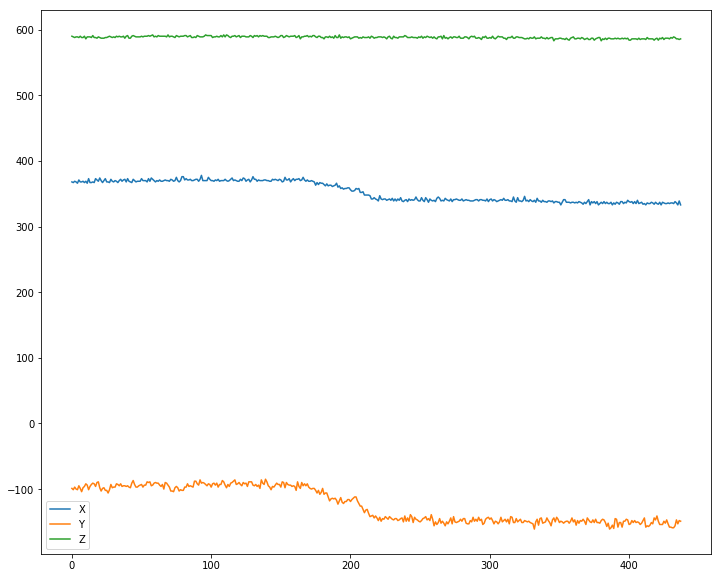

In [65]:
X=df['MagX']
Y=df['MagY']
Z=df['MagZ']
fig,ax=plt.subplots(figsize=[12,10])
ax.plot(X,label="X")
ax.plot(Y,label="Y")
ax.plot(Z,label="Z")
ax.legend()

Decrease in x and y positions near 200

## Accelerations

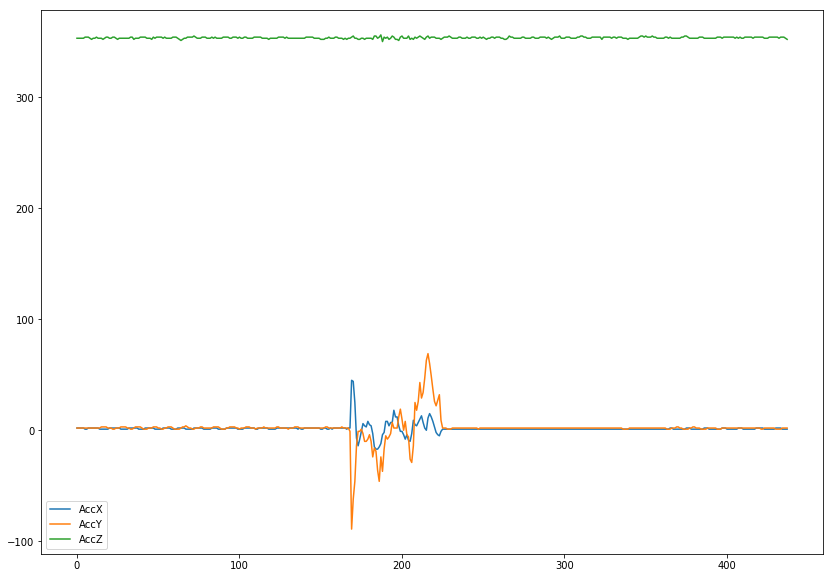

In [68]:
AccX=df['AccX']
AccY=df['AccY']
AccZ=df['AccZ']
fig,ax=plt.subplots(figsize=[14,10])
ax.plot(AccX,label="AccX")
ax.plot(AccY,label="AccY")
ax.plot(AccZ,label="AccZ")
ax.legend()

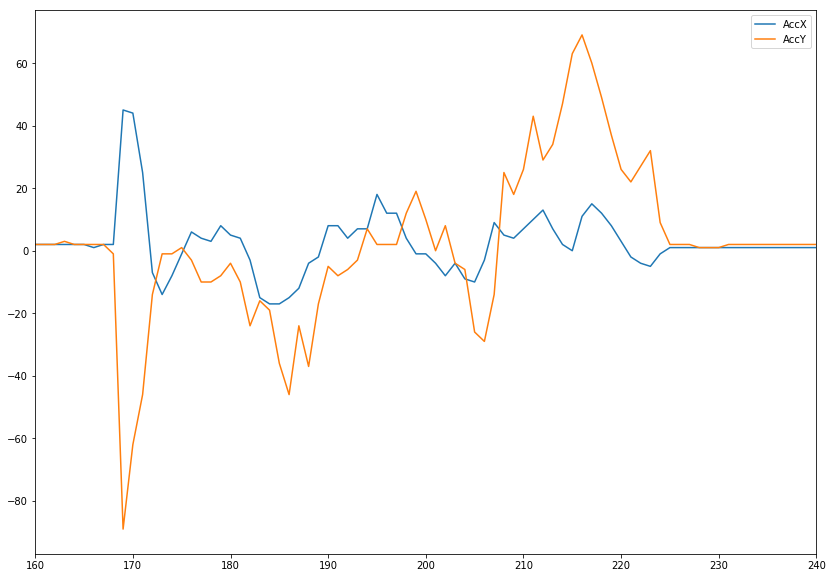

In [92]:
fig,ax=plt.subplots(figsize=[14,10])
ax.plot(AccX,label="AccX")
ax.plot(AccY,label="AccY")
ax.set_xlim([160,240])
#ax.plot(AccZ,label="AccZ")
ax.legend()

rapid acceleration from 165 to 230

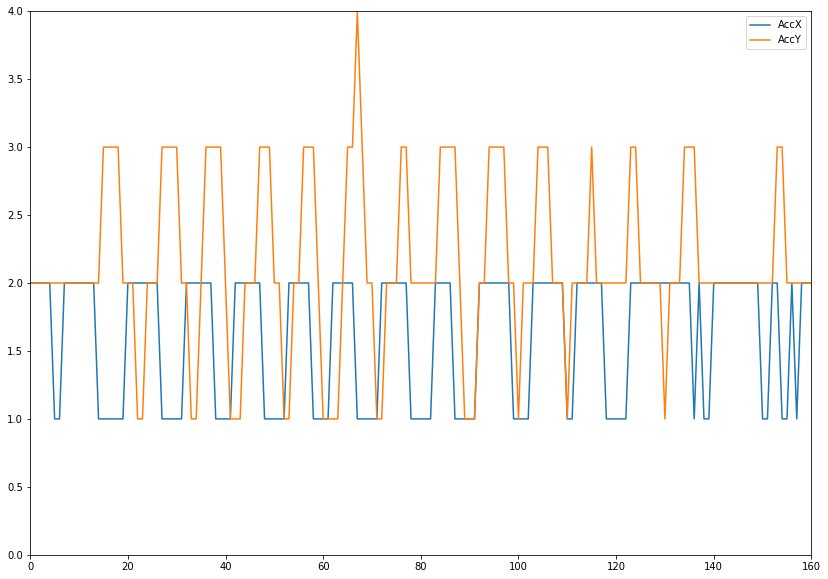

In [97]:
fig,ax=plt.subplots(figsize=[14,10])
ax.plot(AccX,label="AccX")
ax.plot(AccY,label="AccY")
ax.set_xlim([0,160])
ax.set_ylim([0,4])
#ax.plot(AccZ,label="AccZ")
ax.legend()

Oscillatory behavior is observed. Do fft

In [103]:
ftd=np.fft.fft(AccX[0:160])
fftfreq=np.fft.fftfreq(160)
fftfreq

array([ 0.     ,  0.00625,  0.0125 ,  0.01875,  0.025  ,  0.03125,
        0.0375 ,  0.04375,  0.05   ,  0.05625,  0.0625 ,  0.06875,
        0.075  ,  0.08125,  0.0875 ,  0.09375,  0.1    ,  0.10625,
        0.1125 ,  0.11875,  0.125  ,  0.13125,  0.1375 ,  0.14375,
        0.15   ,  0.15625,  0.1625 ,  0.16875,  0.175  ,  0.18125,
        0.1875 ,  0.19375,  0.2    ,  0.20625,  0.2125 ,  0.21875,
        0.225  ,  0.23125,  0.2375 ,  0.24375,  0.25   ,  0.25625,
        0.2625 ,  0.26875,  0.275  ,  0.28125,  0.2875 ,  0.29375,
        0.3    ,  0.30625,  0.3125 ,  0.31875,  0.325  ,  0.33125,
        0.3375 ,  0.34375,  0.35   ,  0.35625,  0.3625 ,  0.36875,
        0.375  ,  0.38125,  0.3875 ,  0.39375,  0.4    ,  0.40625,
        0.4125 ,  0.41875,  0.425  ,  0.43125,  0.4375 ,  0.44375,
        0.45   ,  0.45625,  0.4625 ,  0.46875,  0.475  ,  0.48125,
        0.4875 ,  0.49375, -0.5    , -0.49375, -0.4875 , -0.48125,
       -0.475  , -0.46875, -0.4625 , -0.45625, -0.45   , -0.44

(-0.15, 0.15)

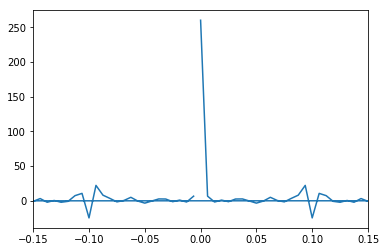

In [106]:
plt.plot(fftfreq,ftd)
plt.xlim([-0.15,0.15])

## Agyro

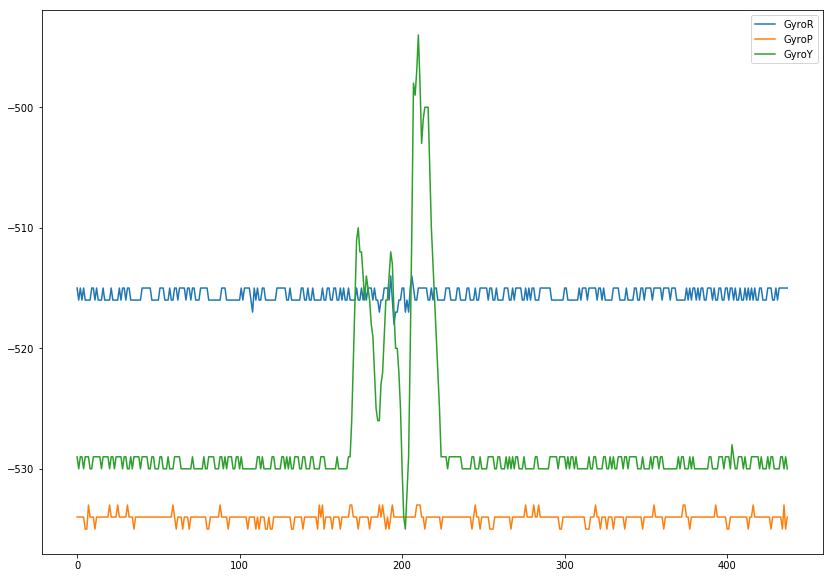

In [69]:
GyroR=df['GyroR']
GyroP=df['GyroP']
GyroY=df['GyroY']
fig,ax=plt.subplots(figsize=[14,10])
ax.plot(GyroR,label="GyroR")
ax.plot(GyroP,label="GyroP")
ax.plot(GyroY,label="GyroY")
ax.legend()

## Acc + Position

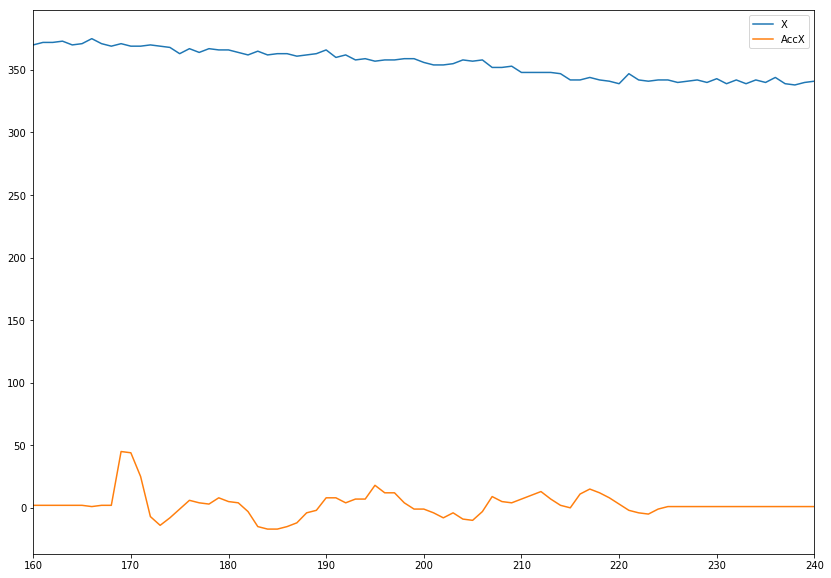

In [82]:
fig,ax=plt.subplots(figsize=[14,10])
ax.plot(X,label="X")
ax.plot(AccX,label="AccX")
ax.set_xlim([160,240])
ax.legend()

In [85]:
AccY[165:225].mean()

1.7666666666666666